In [1]:
from osgeo import gdal, osr
import numpy as np
import matplotlib.pyplot as plt
from osgeo import gdal
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap

## Results plot

In [2]:
gauge_satellite_rmse= 'intercomparison/gauge_satellite_rmse.tif'
radar_satellite_rmse= 'intercomparison/radar_satellite_rmse_cliped.tif'
gauge_radar_rmse= 'intercomparison/gauge_radar_rmse.tif'
gauge_rmse= 'TCresults/rmse_gauge.tif'
satellite_rmse= 'TCresults/rmse_sat.tif'
radar_rmse= 'TCresults/rmse_radar.tif'

gauge_satellite_mae= 'intercomparison/gauge_satellite_mae.tif'
radar_satellite_mae= 'intercomparison/radar_satellite_mae_cliped.tif'
gauge_radar_mae= 'intercomparison/gauge_radar_mae.tif'

gauge_satellite_rmse_norm= 'intercomparison/gauge_satellite_norm_rmse.tif'
radar_satellite_rmse_norm= 'intercomparison/radar_satellite_norm_rmse_cliped.tif'
gauge_radar_rmse_norm= 'intercomparison/gauge_radar_norm rmse.tif'
gauge_rmse= 'TCresults/rmse_gauge.tif'
satellite_rmse= 'TCresults/rmse_sat.tif'
radar_rmse= 'TCresults/rmse_radar.tif'

gauge_satellite_cc= 'intercomparison/gauge_satellite_r.tif'
radar_satellite_cc= 'intercomparison/radar_satellite_r_cliped.tif'
gauge_radar_cc= 'intercomparison/gauge_radar_r.tif'
gauge_cc= 'TCresults/cc_gauge.tif'
satellite_cc= 'TCresults/cc_sat.tif'
radar_cc= 'TCresults/cc_radar.tif'
gauge_radar_pod= 'intercomparison/gauge_radar_pod.tif'
gauge_radar_csi= 'intercomparison/gauge_radar_csi.tif'
gauge_radar_far= 'intercomparison/gauge_radar_far.tif'
radar_satellite_pod= 'intercomparison/radar_satellite_pod_cliped.tif'
radar_satellite_csi= 'intercomparison/radar_satellite_csi_cliped.tif'
radar_satellite_far= 'intercomparison/radar_satellite_far_cliped.tif'
gauge_satellite_pod= 'intercomparison/gauge_satellite_pod.tif'
gauge_satellite_csi= 'intercomparison/gauge_satellite_csi.tif'
gauge_satellite_far= 'intercomparison/gauge_satellite_far.tif'
gauge_sum= 'intercomparison/gauge_satellite_sum_gauge.tif'
radar_sum= 'intercomparison/radar_satellite_sum_radar_cliped.tif'
satellite_sum= 'intercomparison/gauge_satellite_sum_satellite_cliped.tif'

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in less
  


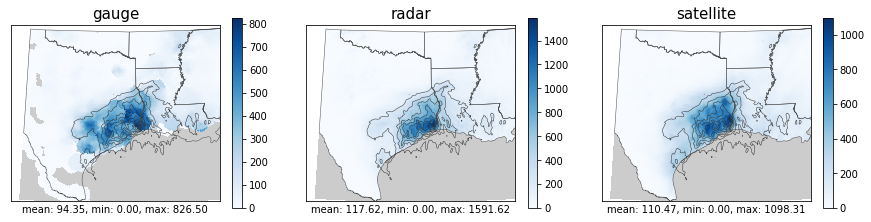

In [8]:
fig= plt.figure(figsize=(15,5))

ax = fig.add_subplot(1,3,1)
ax.set_title("gauge",fontsize=15)
map, avg, mn, mx = plot_amt(gauge_sum)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))

ax = fig.add_subplot(1,3,2)
ax.set_title("radar",fontsize=15)
map, avg, mn, mx = plot_amt(radar_sum)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))

ax = fig.add_subplot(1,3,3)
ax.set_title("satellite",fontsize=15)
map, avg, mn, mx = plot_amt(satellite_sum)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))
fig.savefig('total_comparison.png', dpi=100)

In [5]:
def plot_mae(src):
    # Plotting 2070 projected August (8) precip from worldclim
    gdata = gdal.Open(src)
    geo = gdata.GetGeoTransform()
    data = gdata.ReadAsArray().astype(float)
    xres = geo[1]
    yres = geo[5]
    data[(data<0)]= np.nan
    avg= np.nanmean(data)
    mx= np.nanmax(data)
    mn= np.nanmin(data)

    # A good LCC projection for USA plots
    m = Basemap(llcrnrlon=-101.5,llcrnrlat=25.7,urcrnrlon=-88.4,urcrnrlat=35.2,
                projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

    # This just plots the shapefile -- it has already been clipped
    m.readshapefile('../harveyimpact/harveyimpact','harveyimpact',drawbounds=True, color='0.3')
    m.readshapefile('../harveyimpact/rainfall_amount','rain',drawbounds=True, color='0.2')
    xmin = geo[0] + xres * 0.5
    xmax = geo[0] + (xres * gdata.RasterXSize) - xres * 0.5
    ymin = geo[3] + (yres * gdata.RasterYSize) + yres * 0.5
    ymax = geo[3] - yres * 0.5

    x,y = np.mgrid[xmin:xmax+xres:xres, ymax+yres:ymin:yres]
    x,y = m(x,y)

    cmap = plt.get_cmap('Reds')
    cmap.set_under ('1.0')
    cmap.set_bad('0.8')

    map = m.pcolormesh(x,y, data.T, cmap=cmap, vmin=0, vmax=5)

    cb = plt.colorbar( orientation='vertical', fraction=0.10, shrink=0.7)

    return map, avg, mn, mx

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in less
  


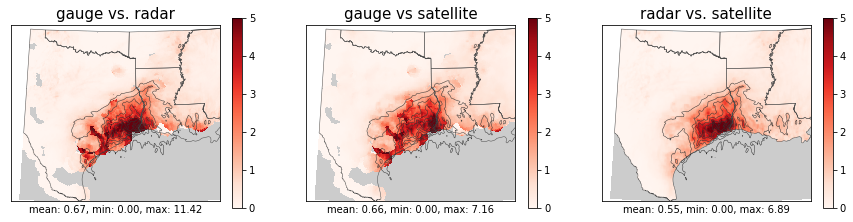

In [6]:
fig= plt.figure(figsize=(15,5))

ax = fig.add_subplot(1,3,1)
ax.set_title("gauge vs. radar",fontsize=15)
map, avg, mn, mx = plot_mae(gauge_radar_mae)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))

ax = fig.add_subplot(1,3,2)
ax.set_title("gauge vs satellite",fontsize=15)
map, avg, mn, mx = plot_mae(gauge_satellite_mae)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))

ax = fig.add_subplot(1,3,3)
ax.set_title("radar vs. satellite",fontsize=15)
map, avg, mn, mx = plot_mae(radar_satellite_mae)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))
fig.savefig('mae_comparison.png', dpi=100)

### Plot RMSE error

In [49]:
def plot(src):
    # Plotting 2070 projected August (8) precip from worldclim
    gdata = gdal.Open(src)
    geo = gdata.GetGeoTransform()
    data = gdata.ReadAsArray().astype(float)
    xres = geo[1]
    yres = geo[5]
    data[(data<0)]= np.nan
    avg= np.nanmean(data)
    mx= np.nanmax(data)
    mn= np.nanmin(data)

    # A good LCC projection for USA plots
    m = Basemap(llcrnrlon=-101.5,llcrnrlat=25.7,urcrnrlon=-88.4,urcrnrlat=35.2,
                projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

    # This just plots the shapefile -- it has already been clipped
    m.readshapefile('../harveyimpact/harveyimpact','harveyimpact',drawbounds=True, color='0.3')
    m.readshapefile('../harveyimpact/rainfall_amount','rain',drawbounds=True, color='0.2')
    xmin = geo[0] + xres * 0.5
    xmax = geo[0] + (xres * gdata.RasterXSize) - xres * 0.5
    ymin = geo[3] + (yres * gdata.RasterYSize) + yres * 0.5
    ymax = geo[3] - yres * 0.5

    x,y = np.mgrid[xmin:xmax+xres:xres, ymax+yres:ymin:yres]
    x,y = m(x,y)

    cmap = plt.get_cmap('Reds')
    cmap.set_under ('1.0')
    cmap.set_bad('0.8')

    map = m.pcolormesh(x,y, data.T, cmap=cmap, vmin=0, vmax=5)

    cb = plt.colorbar( orientation='vertical', fraction=0.10, shrink=0.7)

    return map, avg, mn, mx

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in less
  if __name__ == '__main__':


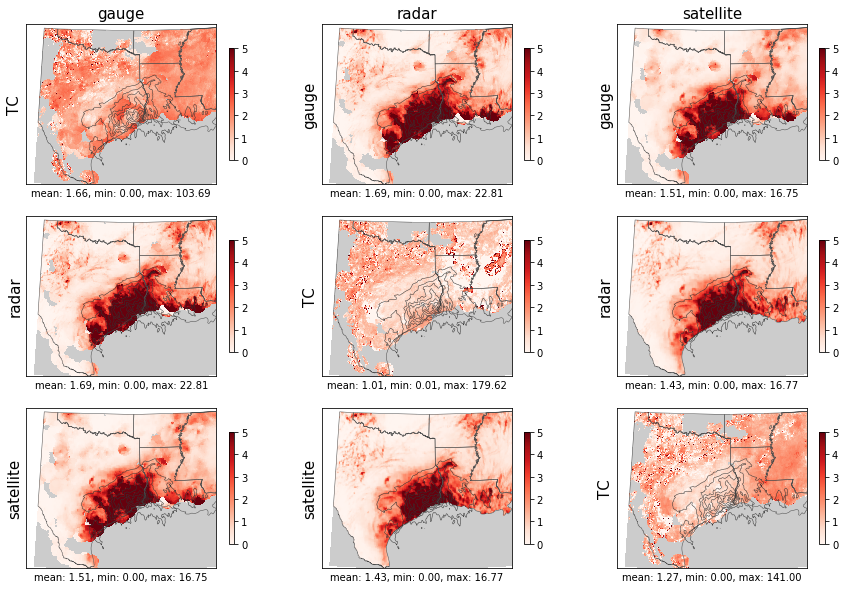

In [89]:
fig= plt.figure(figsize=(15,10))

ax = fig.add_subplot(3,3,1)
ax.set_title("gauge",fontsize=15)
map, avg, mn, mx = plot(gauge_rmse)
ax.set_ylabel('TC',fontsize=15)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))

ax = fig.add_subplot(3,3,2)
ax.set_title("radar",fontsize=15)
map, avg, mn, mx = plot(gauge_radar_rmse)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))
ax.set_ylabel('gauge',fontsize=15)

ax = fig.add_subplot(3,3,3)
ax.set_title("satellite",fontsize=15)
map, avg, mn, mx = plot(gauge_satellite_rmse)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))
ax.set_ylabel('gauge',fontsize=15)

ax = fig.add_subplot(3,3,4)
map, avg, mn, mx = plot(gauge_radar_rmse)
ax.set_ylabel('radar',fontsize=15)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))

ax = fig.add_subplot(3,3,5)

map, avg, mn, mx = plot(radar_rmse)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))
ax.set_ylabel('TC',fontsize=15)

ax = fig.add_subplot(3,3,6)

map, avg, mn, mx = plot(radar_satellite_rmse)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))
ax.set_ylabel('radar',fontsize=15)

ax = fig.add_subplot(3,3,7)
ax.set_ylabel('satellite',fontsize=15)
map, avg, mn, mx = plot(gauge_satellite_rmse)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))

ax = fig.add_subplot(3,3,8)

map, avg, mn, mx = plot(radar_satellite_rmse)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))
ax.set_ylabel('satellite',fontsize=15)

ax = fig.add_subplot(3,3,9)

map, avg, mn, mx = plot(satellite_rmse)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))
ax.set_ylabel('TC',fontsize=15)

plt.show()
fig.savefig('rmse_comparison.png', dpi=100)

In [ ]:
# normalized
fig= plt.figure(figsize=(15,10))

ax = fig.add_subplot(3,3,1)
ax.set_title("gauge",fontsize=15)
map, avg, mn, mx = plot(gauge_rmse)
ax.set_ylabel('TC',fontsize=15)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))

ax = fig.add_subplot(3,3,2)
ax.set_title("radar",fontsize=15)
map, avg, mn, mx = plot(gauge_radar_rmse)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))
ax.set_ylabel('gauge',fontsize=15)

ax = fig.add_subplot(3,3,3)
ax.set_title("satellite",fontsize=15)
map, avg, mn, mx = plot(gauge_satellite_rmse)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))
ax.set_ylabel('gauge',fontsize=15)

ax = fig.add_subplot(3,3,4)
map, avg, mn, mx = plot(gauge_radar_rmse)
ax.set_ylabel('radar',fontsize=15)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))

ax = fig.add_subplot(3,3,5)

map, avg, mn, mx = plot(radar_rmse)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))
ax.set_ylabel('TC',fontsize=15)

ax = fig.add_subplot(3,3,6)

map, avg, mn, mx = plot(radar_satellite_rmse)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))
ax.set_ylabel('radar',fontsize=15)

ax = fig.add_subplot(3,3,7)
ax.set_ylabel('satellite',fontsize=15)
map, avg, mn, mx = plot(gauge_satellite_rmse)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))

ax = fig.add_subplot(3,3,8)

map, avg, mn, mx = plot(radar_satellite_rmse)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))
ax.set_ylabel('satellite',fontsize=15)

ax = fig.add_subplot(3,3,9)

map, avg, mn, mx = plot(satellite_rmse)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))
ax.set_ylabel('TC',fontsize=15)

plt.show()
fig.savefig('rmse_comparison.png', dpi=100)

### Plot CC

In [46]:
def plot_cc(src):
    # Plotting 2070 projected August (8) precip from worldclim
    gdata = gdal.Open(src)
    geo = gdata.GetGeoTransform()
    data = gdata.ReadAsArray().astype(float)
    xres = geo[1]
    yres = geo[5]
    data[(data<0)]= np.nan
    avg= np.nanmean(data)
    mx= np.nanmax(data)
    mn= np.nanmin(data)

    # A good LCC projection for USA plots
    m = Basemap(llcrnrlon=-101.5,llcrnrlat=25.7,urcrnrlon=-88.4,urcrnrlat=35.2,
                projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

    # This just plots the shapefile -- it has already been clipped
    m.readshapefile('../harveyimpact/harveyimpact','harveyimpact',drawbounds=True, color='0.3')
    m.readshapefile('../harveyimpact/rainfall_amount','rain',drawbounds=True, color='0.2')
    xmin = geo[0] + xres * 0.5
    xmax = geo[0] + (xres * gdata.RasterXSize) - xres * 0.5
    ymin = geo[3] + (yres * gdata.RasterYSize) + yres * 0.5
    ymax = geo[3] - yres * 0.5

    x,y = np.mgrid[xmin:xmax+xres:xres, ymax+yres:ymin:yres]
    x,y = m(x,y)

    cmap = plt.get_cmap('Reds')
    cmap.set_under ('1.0')
    cmap.set_bad('0.8')

    map = m.pcolormesh(x,y, data.T, cmap=cmap, vmin=0, vmax=1)

    cb = plt.colorbar( orientation='vertical', fraction=0.10, shrink=0.7)

    return map, avg, mn, mx

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in less
  


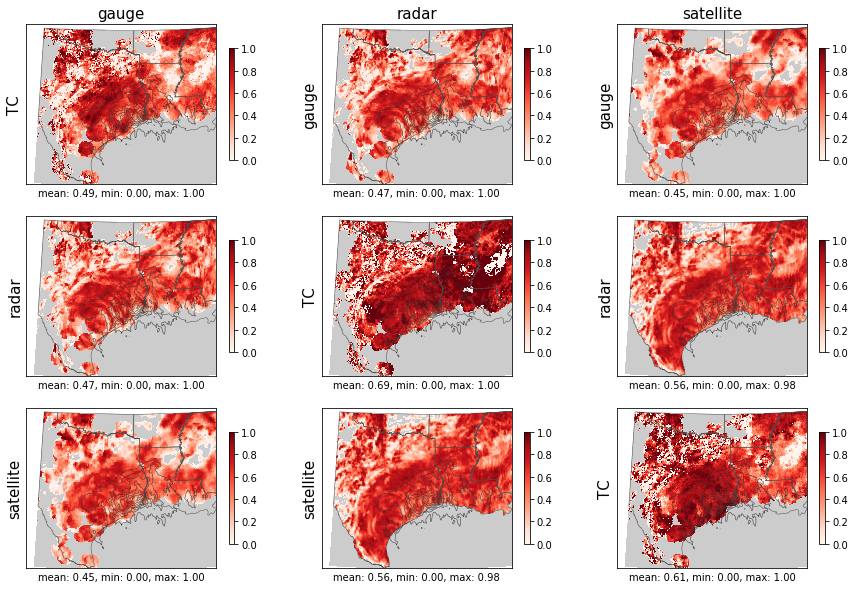

In [90]:
fig= plt.figure(figsize=(15,10))

ax = fig.add_subplot(3,3,1)
ax.set_title("gauge",fontsize=15)
map, avg, mn, mx = plot_cc(gauge_cc)
ax.set_ylabel('TC',fontsize=15)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))

ax = fig.add_subplot(3,3,2)
ax.set_title("radar",fontsize=15)
map, avg, mn, mx = plot_cc(gauge_radar_cc)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))
ax.set_ylabel('gauge',fontsize=15)

ax = fig.add_subplot(3,3,3)
ax.set_title("satellite",fontsize=15)
map, avg, mn, mx = plot_cc(gauge_satellite_cc)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))
ax.set_ylabel('gauge',fontsize=15)

ax = fig.add_subplot(3,3,4)
map, avg, mn, mx = plot_cc(gauge_radar_cc)
ax.set_ylabel('radar',fontsize=15)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))

ax = fig.add_subplot(3,3,5)

map, avg, mn, mx = plot_cc(radar_cc)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))
ax.set_ylabel('TC',fontsize=15)

ax = fig.add_subplot(3,3,6)

map, avg, mn, mx = plot_cc(radar_satellite_cc)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))
ax.set_ylabel('radar',fontsize=15)

ax = fig.add_subplot(3,3,7)
ax.set_ylabel('satellite',fontsize=15)
map, avg, mn, mx = plot_cc(gauge_satellite_cc)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))

ax = fig.add_subplot(3,3,8)

map, avg, mn, mx = plot_cc(radar_satellite_cc)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))
ax.set_ylabel('satellite',fontsize=15)

ax = fig.add_subplot(3,3,9)

map, avg, mn, mx = plot_cc(satellite_cc)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))
ax.set_ylabel('TC',fontsize=15)

plt.show()
fig.savefig('cc_comparison.png', dpi=100)

### Plot hits

In [42]:
def plot_hit(src, cmap='Reds'):
    # Plotting 2070 projected August (8) precip from worldclim
    gdata = gdal.Open(src)
    geo = gdata.GetGeoTransform()
    data = gdata.ReadAsArray().astype(float)
    xres = geo[1]
    yres = geo[5]
    data[(data<0) | (data>1)]= np.nan
    avg= np.nanmean(data)
    mx= np.nanmax(data)
    mn= np.nanmin(data)

    # A good LCC projection for USA plots
    m = Basemap(llcrnrlon=-101.5,llcrnrlat=25.7,urcrnrlon=-88.4,urcrnrlat=35.2,
                projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

    # This just plots the shapefile -- it has already been clipped
    m.readshapefile('../harveyimpact/harveyimpact','harveyimpact',drawbounds=True, color='0.3')
    m.readshapefile('../harveyimpact/rainfall_amount','rain',drawbounds=True, color='0.2')
    xmin = geo[0] + xres * 0.5
    xmax = geo[0] + (xres * gdata.RasterXSize) - xres * 0.5
    ymin = geo[3] + (yres * gdata.RasterYSize) + yres * 0.5
    ymax = geo[3] - yres * 0.5

    x,y = np.mgrid[xmin:xmax+xres:xres, ymax+yres:ymin:yres]
    x,y = m(x,y)

    cmap = plt.get_cmap(cmap)
    cmap.set_under ('1.0')
    cmap.set_bad('0.8')

    map = m.pcolormesh(x,y, data.T, cmap=cmap, vmin=0, vmax=1)

    cb = plt.colorbar( orientation='vertical', fraction=0.10, shrink=0.7)

    return map, avg, mn, mx

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in less
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in greater
  


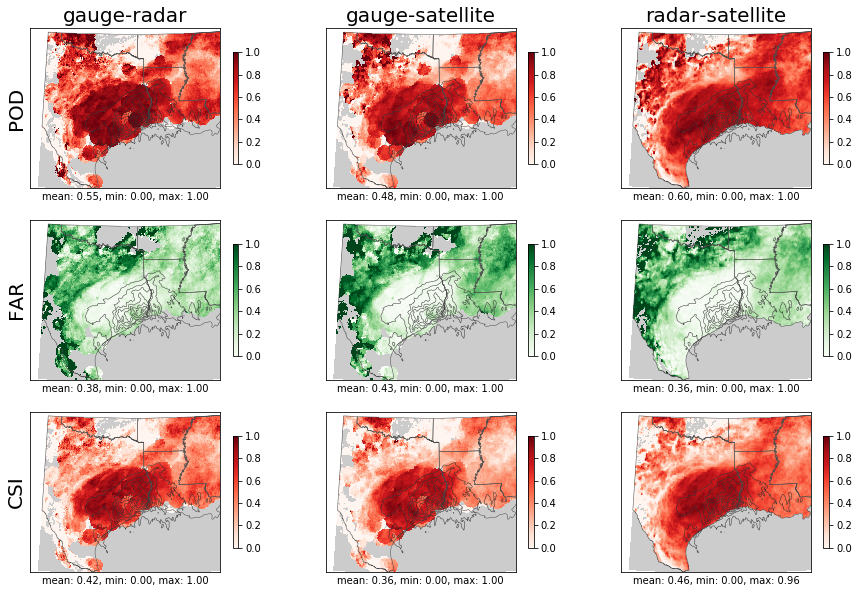

In [91]:
fig= plt.figure(figsize=(15,10))

ax = fig.add_subplot(3,3,1)
ax.set_title("gauge-radar",fontsize=20)
map, avg, mn, mx = plot_hit(gauge_radar_pod)
ax.set_ylabel('POD',fontsize=20)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))

ax = fig.add_subplot(3,3,2)
ax.set_title("gauge-satellite",fontsize=20)
map, avg, mn, mx  = plot_hit(gauge_satellite_pod)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))

ax = fig.add_subplot(3,3,3)
ax.set_title("radar-satellite",fontsize=20)
map, avg, mn, mx  = plot_hit(radar_satellite_pod)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))

ax = fig.add_subplot(3,3,4)
map, avg, mn, mx  = plot_hit(gauge_radar_far, 'Greens')
ax.set_ylabel('FAR',fontsize=20)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))

ax = fig.add_subplot(3,3,5)

map, avg, mn, mx  = plot_hit(gauge_satellite_far, 'Greens')
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))

ax = fig.add_subplot(3,3,6)

map, avg, mn, mx  = plot_hit(radar_satellite_far, 'Greens')
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))
ax = fig.add_subplot(3,3,7)
ax.set_ylabel('CSI',fontsize=20)
map, avg, mn, mx  = plot_hit(gauge_radar_csi)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))
ax = fig.add_subplot(3,3,8)

map, avg, mn, mx  = plot_hit(gauge_satellite_csi)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))
ax = fig.add_subplot(3,3,9)

map, avg, mn, mx  = plot_hit(radar_satellite_csi)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))
plt.show()
fig.savefig('hits_comparison.png', dpi=100)

### Rainfall accumulation and bias ratio

In [3]:
def plot_amt(src, cmap='Blues'):
    # Plotting 2070 projected August (8) precip from worldclim
    gdata = gdal.Open(src)
    geo = gdata.GetGeoTransform()
    data = gdata.ReadAsArray().astype(float)
    xres = geo[1]
    yres = geo[5]
    data[(data<0)]= np.nan
    avg= np.nanmean(data)
    mx= np.nanmax(data)
    mn= np.nanmin(data)

    # A good LCC projection for USA plots
    m = Basemap(llcrnrlon=-101.5,llcrnrlat=25.7,urcrnrlon=-88.4,urcrnrlat=35.2,
                projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

    # This just plots the shapefile -- it has already been clipped
    m.readshapefile('../harveyimpact/harveyimpact','harveyimpact',drawbounds=True, color='0.3')
    m.readshapefile('../harveyimpact/rainfall_amount','rain',drawbounds=True, color='0.2')
    xmin = geo[0] + xres * 0.5
    xmax = geo[0] + (xres * gdata.RasterXSize) - xres * 0.5
    ymin = geo[3] + (yres * gdata.RasterYSize) + yres * 0.5
    ymax = geo[3] - yres * 0.5

    x,y = np.mgrid[xmin:xmax+xres:xres, ymax+yres:ymin:yres]
    x,y = m(x,y)

    cmap = plt.get_cmap(cmap)
    cmap.set_under ('1.0')
    cmap.set_bad('0.8')

    map = m.pcolormesh(x,y, data.T, cmap=cmap, vmin=0, vmax=mx)

    cb = plt.colorbar( orientation='vertical', fraction=0.10, shrink=0.7)

    return map, avg, mn, mx

In [85]:
def plot_rat(src1, src2, cmap='cool'):
    # Plotting 2070 projected August (8) precip from worldclim
    gdata1 = gdal.Open(src1)
    gdata2 = gdal.Open(src2) 
    
    geo = gdata1.GetGeoTransform()
    data1 = gdata1.ReadAsArray().astype(float)
    data2= gdata2.ReadAsArray().astype(float)
    if data1.shape[0]==data2.shape[0]+1:
        data1= data1[:-1,:]
        geo = gdata2.GetGeoTransform()
        gdata= gdata2
    elif data1.shape[0]==data2.shape[0]-1:
        data2= data2[:-1,:]
        geo = gdata1.GetGeoTransform()
        gdata= gdata1
    else:
        gdata= gdata1
    data1[data1<=0.1]= np.nan
    data2[data2<=0.1]= np.nan
    data= data1/data2
    xres = geo[1]
    yres = geo[5]
    data[(data<0)]= np.nan
    avg= np.nanmean(data)
    mx= np.nanmax(data)
    mn= np.nanmin(data)

    # A good LCC projection for USA plots
    m = Basemap(llcrnrlon=-101.5,llcrnrlat=25.7,urcrnrlon=-88.4,urcrnrlat=35.2,
                projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

    # This just plots the shapefile -- it has already been clipped
    m.readshapefile('../harveyimpact/harveyimpact','harveyimpact',drawbounds=True, color='0.3')
    m.readshapefile('../harveyimpact/rainfall_amount','rain',drawbounds=True, color='0.2')
    xmin = geo[0] + xres * 0.5
    xmax = geo[0] + (xres * gdata.RasterXSize) - xres * 0.5
    ymin = geo[3] + (yres * gdata.RasterYSize) + yres * 0.5
    ymax = geo[3] - yres * 0.5

    x,y = np.mgrid[xmin:xmax+xres:xres, ymax+yres:ymin:yres]
    x,y = m(x,y)

    cmap = plt.get_cmap(cmap)
    cmap.set_under ('1.0')
    cmap.set_bad('0.8')

    map = m.pcolormesh(x,y, data.T, cmap=cmap, vmin=0, vmax=2)

    cb = plt.colorbar( orientation='vertical', fraction=0.10, shrink=0.7)

    return map, avg, mn, mx

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in less
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in less_equal
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in less
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in less_equal


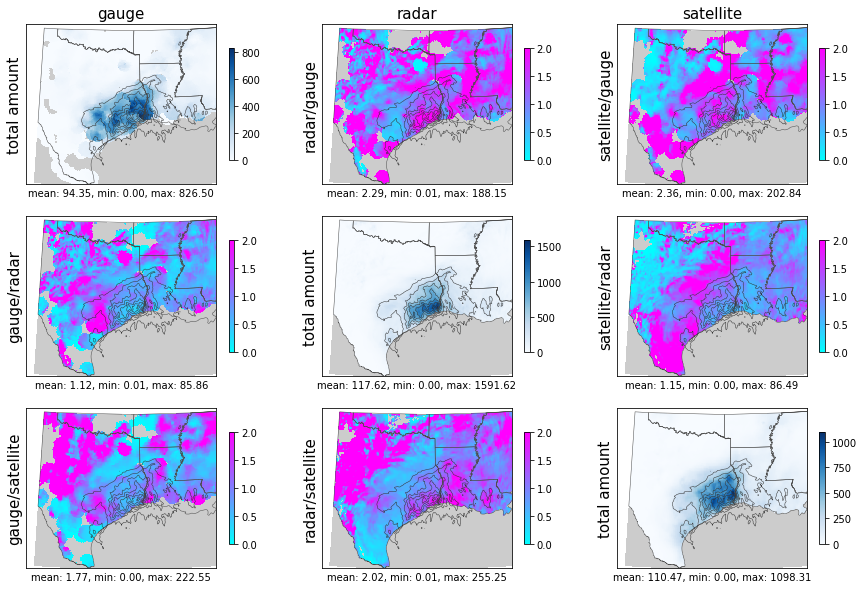

In [87]:
fig= plt.figure(figsize=(15,10))

ax = fig.add_subplot(3,3,1)
ax.set_title("gauge",fontsize=15)
map, avg, mn, mx = plot_amt(gauge_sum)
ax.set_ylabel('total amount',fontsize=15)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))

ax = fig.add_subplot(3,3,2)
ax.set_title("radar",fontsize=15)
map, avg, mn, mx = plot_rat(radar_sum,gauge_sum)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))
ax.set_ylabel('radar/gauge',fontsize=15)

ax = fig.add_subplot(3,3,3)
ax.set_title("satellite",fontsize=15)
map, avg, mn, mx = plot_rat(satellite_sum, gauge_sum)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))
ax.set_ylabel('satellite/gauge',fontsize=15)

ax = fig.add_subplot(3,3,4)
map, avg, mn, mx = plot_rat(gauge_sum, radar_sum)
ax.set_ylabel('gauge/radar',fontsize=15)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))

ax = fig.add_subplot(3,3,5)

map, avg, mn, mx = plot_amt(radar_sum)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))
ax.set_ylabel('total amount',fontsize=15)

ax = fig.add_subplot(3,3,6)

map, avg, mn, mx = plot_rat(satellite_sum, radar_sum)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))
ax.set_ylabel('satellite/radar',fontsize=15)

ax = fig.add_subplot(3,3,7)
ax.set_ylabel('gauge/satellite',fontsize=15)
map, avg, mn, mx = plot_rat(gauge_sum, satellite_sum)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))

ax = fig.add_subplot(3,3,8)

map, avg, mn, mx = plot_rat(radar_sum, satellite_sum)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))
ax.set_ylabel('radar/satellite',fontsize=15)

ax = fig.add_subplot(3,3,9)

map, avg, mn, mx = plot_amt(satellite_sum)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))
ax.set_ylabel('total amount',fontsize=15)

plt.show()
fig.savefig('volume_ratio.png', dpi=100)